In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Classificação

### Leitura e Modelagem dos Dados

In [2]:
# Leitura dos dados
dados = np.genfromtxt('./vowel.csv', delimiter=',')

# 5 primeiros dados do arquivo
dados[:5]

array([[-3.639,  0.418, -0.67 ,  1.779, -0.168,  1.627, -0.388,  0.529,
        -0.874, -0.814,  8.   ],
       [-3.327,  0.496, -0.694,  1.365, -0.265,  1.933, -0.363,  0.51 ,
        -0.621, -0.488,  2.   ],
       [-2.12 ,  0.894, -1.576,  0.147, -0.707,  1.559, -0.579,  0.676,
        -0.809, -0.049,  1.   ],
       [-2.287,  1.809, -1.498,  1.012, -1.053,  1.06 , -0.567,  0.235,
        -0.091, -0.795,  0.   ],
       [-2.598,  1.938, -0.846,  1.062, -1.633,  0.764,  0.394, -0.15 ,
         0.277, -0.396,  5.   ]])

In [3]:
# Formato total dos nossos dados
dados.shape

(990, 11)

#### Preparando as entradas do Modelo

In [4]:
# Separação dos conjuntos de treino e teste
# 80%, 20%

# A validação será usada

train_df, test_df = train_test_split(dados, test_size=0.2)

print(f"{train_df.shape}\n{test_df.shape}")

(792, 11)
(198, 11)


In [5]:
# Separação das features de cada um dos df
train_features = train_df[:,:-1]
test_features = test_df[:,:-1]

train_labels = train_df[:,[-1]]
test_labels = test_df[:,[-1]]

In [6]:
scaler = StandardScaler()

normed_train_data = scaler.fit_transform(train_features)
normed_test_data = scaler.transform(test_features)

### Construção do Modelo

In [7]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[train_features.shape[1]]),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(11, activation=tf.nn.softmax)
])

# Otimização via gradiente descendente estocástico
optimizer = tf.keras.optimizers.SGD(0.01)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

#### Detalhes Gerais

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2816      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 11)                1

#### Treinamento

In [9]:
EPOCHS = 1000

# Minibatch de 32
# Validação de 20% do total de dados
historico = model.fit(normed_train_data, train_labels,
                      epochs=EPOCHS, verbose=0, validation_split = 0.25, batch_size=32)

### Métricas Gerais

In [10]:
hist = pd.DataFrame(historico.history)
hist['epoch'] = historico.epoch
hist['epoch'] = hist['epoch'] + 1
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
995,0.044701,0.988216,0.051221,0.979798,996
996,0.051412,0.986532,0.050332,0.984848,997
997,0.062351,0.981481,0.052476,0.979798,998
998,0.053339,0.986532,0.054305,0.979798,999
999,0.059941,0.981481,0.054476,0.979798,1000


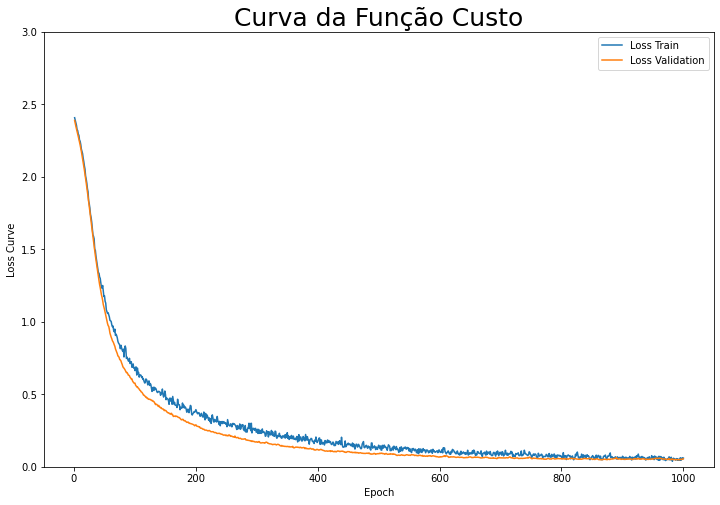

In [11]:
plt.figure(figsize=(12,8))
plt.plot(hist['epoch'], hist['loss'], label='Loss Train')
plt.plot(hist['epoch'], hist['val_loss'], label='Loss Validation')
plt.title('Curva da Função Custo', size=25)
plt.xlabel('Epoch')
plt.ylabel('Loss Curve')
plt.ylim([0,3])
plt.legend();

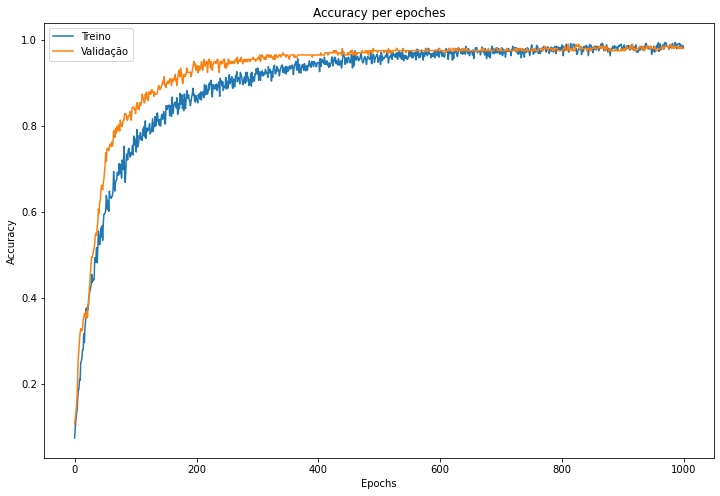

In [12]:
val_acc = hist['val_accuracy']
acc = hist['accuracy']
val_loss = hist['val_loss']
loss = hist['loss']

plt.figure(figsize=(12,8))
plt.plot(acc)
plt.plot(val_acc)
plt.title("Accuracy per epoches")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Treino", "Validação"]);

In [13]:
loss, accuracy = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Accuracy: {:5.2f}%".format(accuracy*100))

7/7 - 0s - loss: 0.0801 - accuracy: 0.9697
Testing set Accuracy: 96.97%
